# Setup

In [19]:
import pandas as pd
import os
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
path = os.path.abspath('')
path = path + "/engineered_data_250ms_window80_step8.csv"
df = pd.read_csv(path)

print("Shape of DataFrame:", df.shape, "and number of features after deleting base columns:", len(df.drop(["Window", "Participant", "Run", "Path"], axis=1).columns))

Shape of DataFrame: (1306, 226) and number of features after deleting base columns: 222


# Preprocessing data 
The goal here is to ensure that the originally engineered data set is used with the 226 columns that we developed. I wanted to create a dataset that can be easily truncated later on. In order to do that I look at the whole dataset first. I will check for shape and ensure all are numerical values. A test and training set are created. Afterwards I have been trying out a little bit of robustscaler to ensure all the data is normalized properly before feeding it to an LSTM, which benefits from quicker convergence if data is normalized already. 

In [44]:
#cleaning the data set further
# Replace string values with numerical values for easier processing in models
df['Participant'] = df['Participant'].replace({'Dany': 0, 'Felix': 1, 'Julian': 2, 'Mark': 3, 'Martin': 4, 'Michele': 5, 'Paul': 6}) # for participants column
df['Path'] = df['Path'].replace({'straight': 0, 'circle': 1}) #for path column
#differentiate runs for later group by
X_Train = df[df['Run'] < 4].copy()
X_Test = df[df['Run'] == 4].copy()
#Change run here
for i in range(1,5):
    X_Train.loc[(X_Train['Path'] == 1) & (X_Train['Run'] == i), 'Run'] = i + 4
    X_Test.loc[(X_Test['Path'] == 1) & (X_Test['Run'] == i), 'Run'] = i + 4
#create train/test set
#should maybe do random runs in the future


# Extracting targets
Y_Train = X_Train.pop('Participant')
Y_Test = X_Test.pop('Participant')

# Verifying the final shapes and content of datasets
print("X_Train shape:", X_Train.shape)
print("X_Test shape:", X_Test.shape)
print("Y_Train shape:", Y_Train.shape)
print("Y_Test shape:", Y_Test.shape)

#Display a few rows to confirm correct data setup
print(X_Train['Path'].sample(3))
print(X_Test['Path'].sample(3))

# In order to solve the NaN issue, i try to locate the values
print("NaN in X_Train:", X_Train.isnull().sum().sum())
print("NaN in Y_Train:", Y_Train.isnull().sum().sum())
print("NaN in X_Test:", X_Test.isnull().sum().sum())

# If you'd like to see an example of where the NaN is located, uncomment below. 
# # Find rows with NaN values in X_Train
# nan_rows_X_Train = X_Train[X_Train.isnull().any(axis=1)]
# print("Rows with NaN values in X_Train:")
# print(nan_rows_X_Train)


# # Find rows with NaN values in X_Test
# nan_rows_X_Test = X_Test[X_Test.isnull().any(axis=1)]
# print("Rows with NaN values in X_Test:")
# print(nan_rows_X_Test)

# Print the number of unique rows that have NaN in X_Train and X_Test
# print("Number of unique rows with NaN in X_Train:", nan_rows_X_Train.shape[0])
# print("Number of unique rows with NaN in X_Test:", nan_rows_X_Test.shape[0])

# In order to solve the NaN issue in the SVM I will drop the the NaN values
# Remove rows with NaN values from X_Train and X_Test
X_Train_cleaned = X_Train.dropna()
X_Test_cleaned = X_Test.dropna()

# Ensure the target variables are aligned
Y_Train_cleaned = Y_Train[X_Train_cleaned.index]
Y_Test_cleaned = Y_Test[X_Test_cleaned.index]

# Ensure Y_Train_cleaned and Y_Test_cleaned is of integer type
Y_Train_cleaned = Y_Train_cleaned.astype(int)
Y_Test_cleaned = Y_Test_cleaned.astype(int)
X_Train['Path'].to_string()

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
30      1
31      1
32      1
33      1
34      1
35      1
36      1
37      1
38      1
39      1
40      1
41      1
42      1
43      1
44      1
45      1
46      1
47      1
48      1
49      1
50      1
51      1
52      1
53      1
54      1
55      1
56      1
57      1
58      1
59      1
60      1
61      1
62      1
63      1
64      1
65      1
66      1
67      1
68      1
69      1
70      1
71      1
72      1
73      1
74      1
75      1
76      1
77      1
78      1
79      1
80      1
81      1
82      1
83      1
84      1
85      1
86      1
87      1
88      1
89      1
90      1
91      1
92      1
93      1
94      1
95      1
96      1
97      1
98      1
99      1


'121     0\n122     0\n123     0\n124     0\n125     0\n126     0\n127     0\n128     0\n129     0\n130     0\n131     0\n132     0\n133     0\n134     0\n135     0\n136     0\n137     0\n138     0\n139     0\n140     0\n141     0\n142     0\n143     0\n144     0\n145     0\n146     0\n147     0\n148     0\n149     0\n150     0\n151     0\n152     0\n153     0\n154     0\n155     0\n156     0\n157     0\n158     0\n159     0\n160     0\n161     0\n162     0\n163     0\n164     0\n165     0\n166     0\n167     0\n168     0\n169     0\n170     0\n171     0\n172     0\n173     0\n174     0\n175     0\n176     0\n177     0\n178     0\n179     0\n180     0\n181     0\n182     0\n183     0\n184     0\n185     0\n186     0\n187     0\n188     0\n189     0\n190     0\n191     0\n192     0\n193     0\n194     0\n195     0\n196     0\n197     0\n198     0\n199     0\n200     0\n201     0\n202     0\n203     0\n204     0\n205     0\n206     0\n207     0\n208     0\n209     0\n210     0\n211     0

# Normalizing
I have not completed this step, could you please pick this up and ensure the data is normalized?
Data of the first four columns are not to be normalized and need to remain the same, the rest of the data is sensor data and should be normalized I haven't figured it out yet. 

In [22]:
# # Define a ColumnTransformer that will apply RobustScaler to all columns except the first four
# # The first four columns are passed through without scaling using 'passthrough'
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', RobustScaler(), df.columns[4:]),  # Apply RobustScaler to columns from the 5th to the last
#         ('pass', 'passthrough', df.columns[:4])   # Pass through the first four columns without scaling
#     ],
#     remainder='drop'  # Drop columns not specified explicitly (none in this case)
# )
# 
# # Fit and transform the data using ColumnTransformer
# df_scaled = pd.DataFrame(preprocessor.fit_transform(df), columns=df.columns)
# 
# # Print or analyze the transformed DataFrame
# print(df_scaled.head())

## Locating NaN values and ensuring proper deletion
Here I have attempted to get a good understtanding of where the NaN data is located in our dataset. 
Afterwards I will do a detailed analysis of the columns and rows specifically. I go through some cycles and different approaches in deleting the NaN values. I started with deleting the columns with a 100% NaN but later made a graph that shows the cutoff point in the data I will actually use. If you run the code and just read the comments and graphs you should be able to understand the gist of it. 

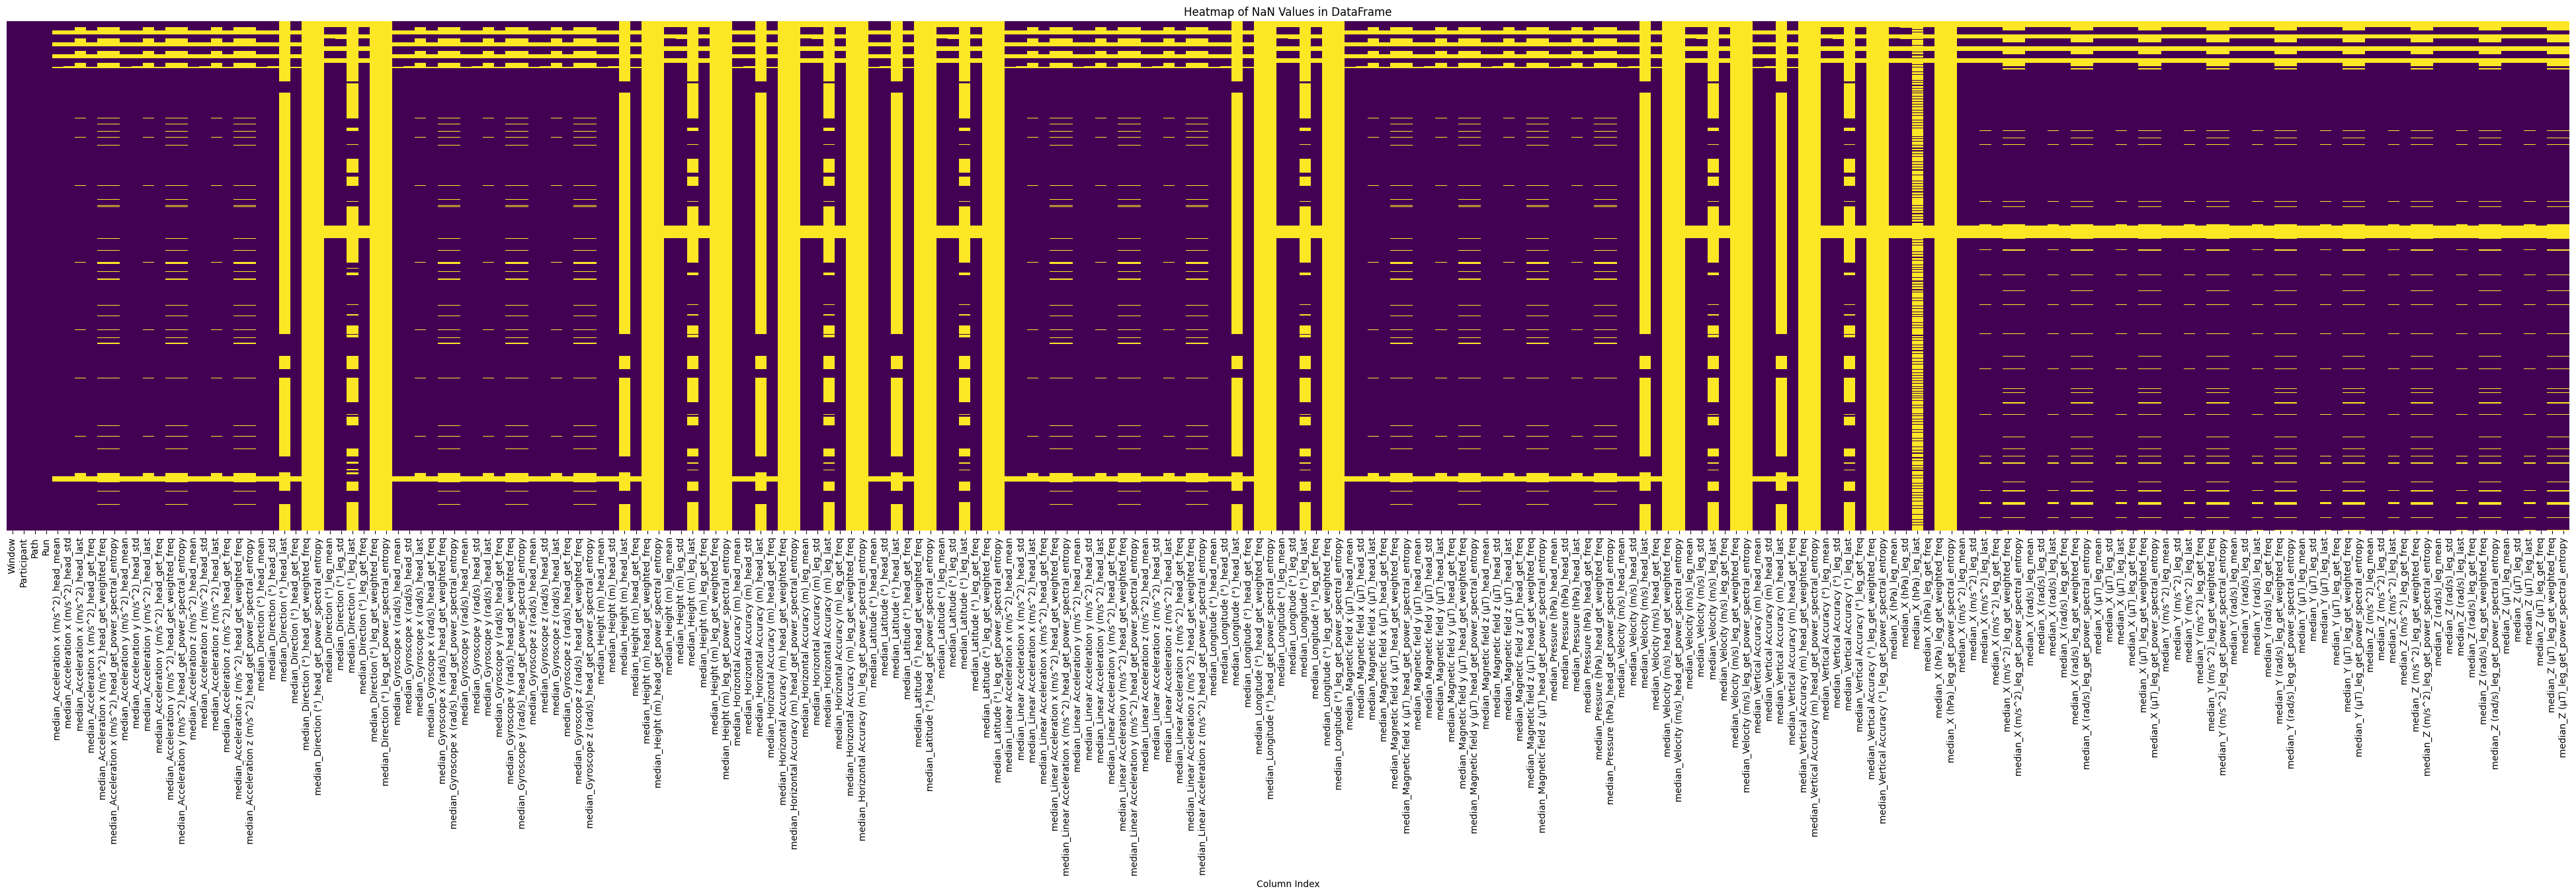

In [23]:
# Create a binary DataFrame showing where NaNs are located
nan_map = df.isnull()

# Create a heatmap
plt.figure(figsize=(50, 10))  # Adjust size as needed to display all columns
sns.heatmap(nan_map, cbar=False, yticklabels=False, cmap='viridis')
plt.title('Heatmap of NaN Values in DataFrame')
plt.xlabel('Column Index')
plt.show()

In [24]:
# Check how many columns have 100 percent NaN
columns_to_drop = df.columns[df.isnull().mean() == 1]
print("Numbers of columns that have 100% NaN:", len(columns_to_drop))
#drop NaN columns
df_cleaned = df.drop(columns=df.columns[df.isnull().mean() == 1])

Numbers of columns that have 100% NaN: 30


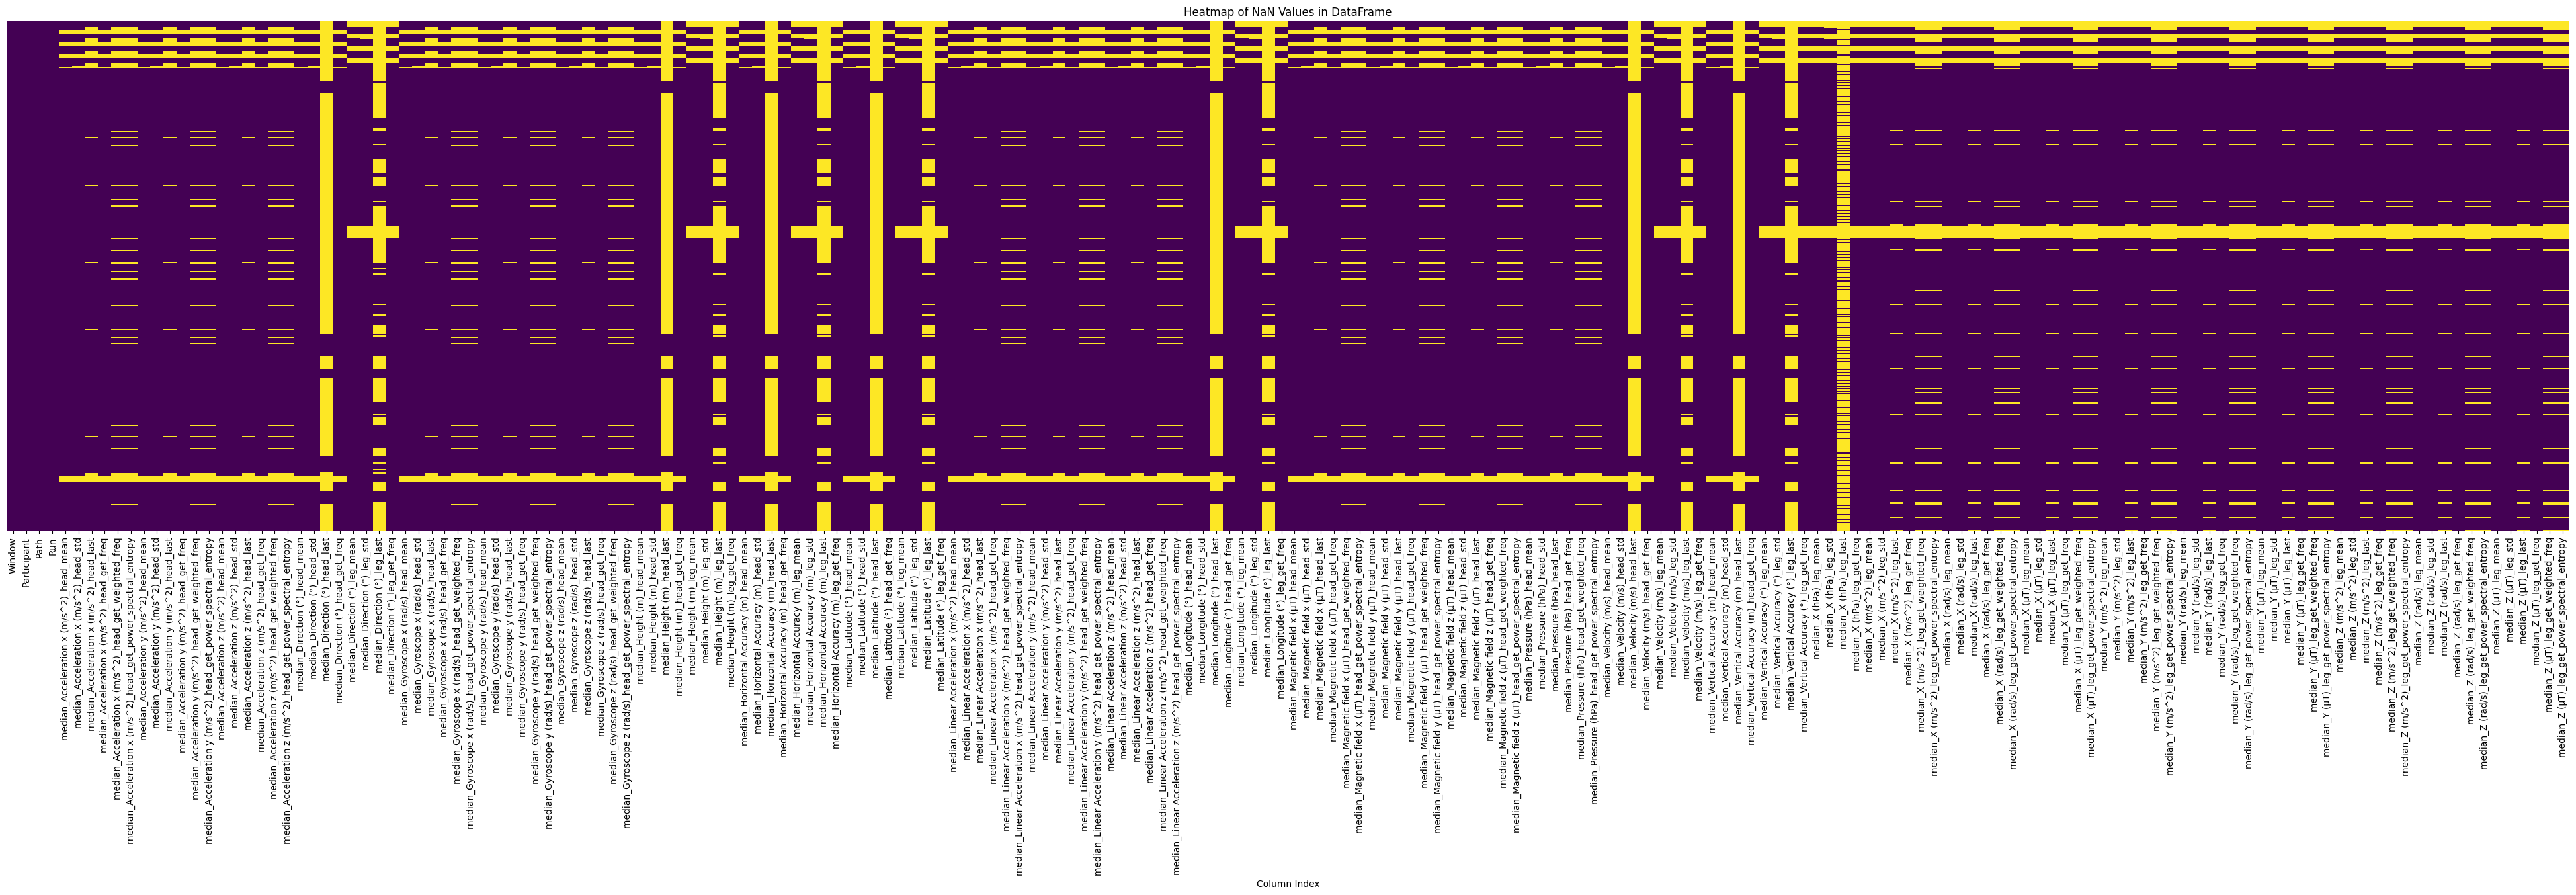

In [25]:
# create an updated map of the NaN
nan_map = df_cleaned.isnull()

# Create a heatmap
plt.figure(figsize=(50, 10))  # Adjust size as needed to display all columns
sns.heatmap(nan_map, cbar=False, yticklabels=False, cmap='viridis')
plt.title('Heatmap of NaN Values in DataFrame')
plt.xlabel('Column Index')
plt.show()

### This area is used to more formally find a good cutoff point for the NaN values. 
The columns that have more than 20% NaN values can be deleted without losing all too many features. The rest of the missing data should be imputed. Probably it is best to use interpolation for that. 

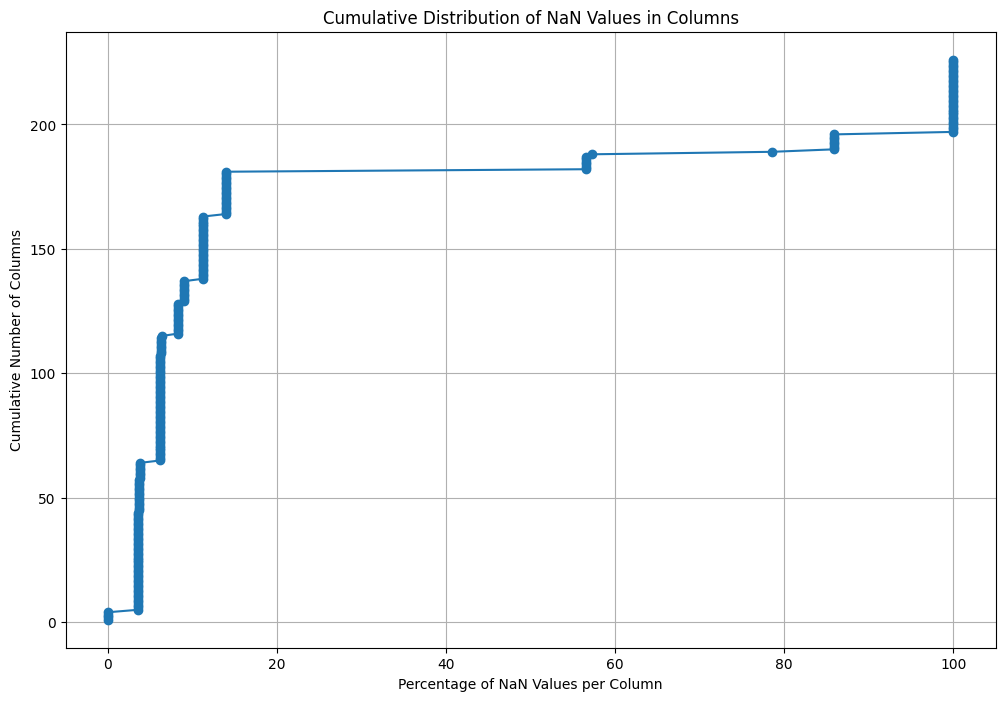

In [26]:
# Calculate the percentage of NaN values for each column
perc_NaN_per_column = df.isnull().mean() * 100

# Sort the percentages
sorted_perc = np.sort(perc_NaN_per_column)

# Calculate the cumulative count of columns
cumulative_counts = np.arange(1, len(sorted_perc) + 1)

# Plot the cumulative distribution
plt.figure(figsize=(12, 8))
plt.plot(sorted_perc, cumulative_counts, marker='o', linestyle='-')
plt.xlabel('Percentage of NaN Values per Column')
plt.ylabel('Cumulative Number of Columns')
plt.title('Cumulative Distribution of NaN Values in Columns')
plt.grid(True)
plt.show()

### Row NaN deletion
It is probably a good idea to delete the rows that have more than 50 or 55% of NaN and impute the rest using interpolation. The reason I give this amount is because deleting at the 22% mark would result in about 15-20% loss of data, which I find a bit too much for the rows. Especially if we will impute some missing data I think it makes sense to not delete all too many rows. 

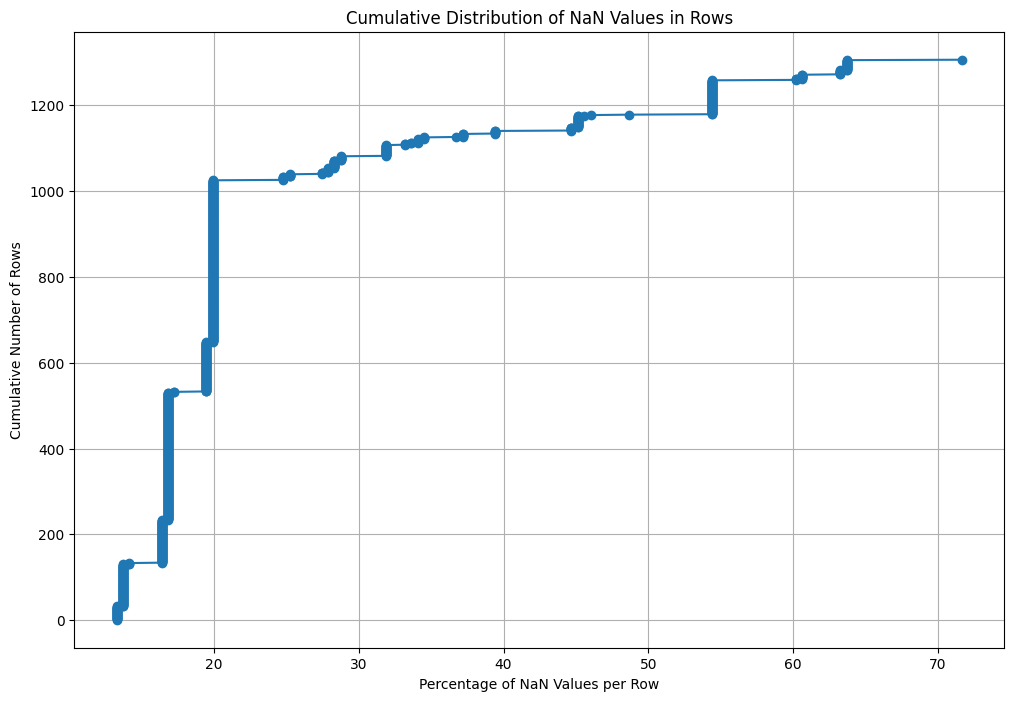

In [27]:
# Calculate the percentage of NaN values for each row
perc_NaN_per_row = df.isnull().mean(axis=1) * 100

# Sort the percentages
sorted_perc = np.sort(perc_NaN_per_row)

# Calculate the cumulative count of rows
cumulative_counts = np.arange(1, len(sorted_perc) + 1)

# Plot the cumulative distribution
plt.figure(figsize=(12, 8))
plt.plot(sorted_perc, cumulative_counts, marker='o', linestyle='-')
plt.xlabel('Percentage of NaN Values per Row')
plt.ylabel('Cumulative Number of Rows')
plt.title('Cumulative Distribution of NaN Values in Rows')
plt.grid(True)
plt.show()



# Next steps - TODO 
So far the data has been preprocessed for 50%. 
There needs to be some more adjustments to it. 
These are:

- Normalizing (I haven't tested this out yet)
- Deleting the columns that have more than 20% NaN values
- Deleting the rows that have more than 50 or 55% of NaN values
- Imputing the missing data using interpolation (or another suitable temporally coherent method)
- Setting up the LSTM data pipeline and feed data
- Interpret results of the model






In [33]:
#DATA PREP FOR LSTM
import torch
 
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence
 
columns_to_drop = ['Path', 'Window']
x = X_Train.drop(columns=columns_to_drop, inplace=False)
y = Y_Train
x['participant_id'] = y
x_series = []
for d1 in x.groupby('participant_id'):
    for d2 in d1[1].groupby('Run'):
        data = d2[1].drop(['participant_id', 'Run'], axis=1)
        x_series.append(data.to_numpy())
 
class PadSequenceDataset(Dataset):
    def __init__(self, sequences, labels):
        self.sequences = sequences
        self.labels = labels
 
    def __len__(self):
        return len(self.sequences)
 
    def __getitem__(self, idx):
        sequence = self.sequences[idx]
        label = self.labels[idx]
        return torch.tensor(sequence, dtype=torch.float), torch.tensor(label, dtype=torch.long)
 
def pad_collate(batch):
    (xx, yy) = zip(*batch)
    xx_pad = pad_sequence(xx, batch_first=True, padding_value=0)
    yy_tensor = torch.stack(yy)
    return xx_pad, yy_tensor
 
# Assuming x_series is a list of numpy arrays and y is a list of labels
dataset = PadSequenceDataset(x_series, y)
dataloader = DataLoader(dataset, batch_size=8, shuffle=True, collate_fn=pad_collate)
print(x_series)
print(len(x_series))
# print(len(y))
# niter = 0
# for x, y in dataloader:
#     print(x.shape)
#     print(y)
#     if niter == 5:
#         break
#     niter += 1

[array([[-2.14767797,  1.508161  , -2.76729941, ...,  0.        ,
                nan,         nan],
       [-2.1405481 ,  1.5162978 , -2.94855571, ...,  0.        ,
                nan,         nan],
       [-2.19625974,  1.47858464, -2.63868511, ...,  0.        ,
                nan,         nan],
       ...,
       [-2.72077768,  0.75774923, -2.53130734, ...,  0.        ,
         0.08432699,  0.21935094],
       [-2.71959249,  0.84681231, -3.26620293, ...,  0.        ,
         0.10757602,  0.55819674],
       [-2.7487251 ,  0.82654833, -2.82083881, ...,  0.        ,
         0.08185629,  1.43341631]]), array([[-2.39051139,  1.31827061, -3.62183618, ...,  0.        ,
         0.08092947,  1.59619022],
       [-2.35881091,  1.31834375, -3.15314198, ...,  0.        ,
         0.07935189,  1.15669675],
       [-2.42970576,  1.16055114, -2.17926323, ...,  0.        ,
         0.06037868,  0.60344471],
       ...,
       [-2.76058079,  0.593698  , -2.53040993, ...,  0.        ,
        

In [32]:
import torch
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence
import pandas as pd

# Assuming X_Train and Y_Train are your input DataFrames

columns_to_drop = ['Path', 'Window']
x = X_Train.drop(columns=columns_to_drop, inplace=False)
y = Y_Train

x['participant_id'] = y
x_series = []

# Verify the unique participants and runs
unique_participants = x['participant_id'].unique()
print("Unique participants:", unique_participants)

for d1 in x.groupby('participant_id'):
    for d2 in d1[1].groupby('Run'):
        data = d2[1].drop(['participant_id', 'Run'], axis=1)
        x_series.append(data.to_numpy())

# Check if x_series and y have the same length
print(f"Number of sequences: {len(x_series)}")
print(f"Number of labels: {len(y)}")

if len(x_series) != len(y):
    raise ValueError("The number of sequences and labels do not match!")

class PadSequenceDataset(Dataset):
    def __init__(self, sequences, labels):
        self.sequences = sequences
        self.labels = labels

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        sequence = self.sequences[idx]
        label = self.labels[idx]
        return torch.tensor(sequence, dtype=torch.float), torch.tensor(label, dtype=torch.long)

def pad_collate(batch):
    (xx, yy) = zip(*batch)
    xx_pad = pad_sequence(xx, batch_first=True, padding_value=0)
    yy_tensor = torch.stack(yy)
    return xx_pad, yy_tensor

# Assuming x_series is a list of numpy arrays and y is a list of labels
dataset = PadSequenceDataset(x_series, y)
dataloader = DataLoader(dataset, batch_size=8, shuffle=True, collate_fn=pad_collate)

niter = 0
for batch_x, batch_y in dataloader:
    print(batch_x.shape)
    print(batch_y)
    if niter == 5:
        break
    niter += 1


Unique participants: [0 1 2 3 4 5 6]
Number of sequences: 21
Number of labels: 683


ValueError: The number of sequences and labels do not match!

In [ ]:
import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.utils.data import Dataset

input_size = 10
sequence_length = 10
num_layers = 2
hidden_size = 256

learning_rate = 0.001
num_epochs = 5
num_classes = 7
batch_size = 64


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class SimpleGRU(nn.Module):
    def __init__(self, input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, num_classes=num_classes, sequence_length=sequence_length):
        super(SimpleGRU, self).__init__()
        self.hidden_size  = hidden_size
        self.num_layers = num_layers
        
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.fc1 = nn.Linear(hidden_size * sequence_length, num_classes)
    
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        
        out,_ = self.gru(x, h0)
        out = out.reshape(out.shape[0], -1)
        out = self.fc1(out)
        return out

In [ ]:
model = SimpleGRU().to(device=device)
x = torch.randn(64,10,10).to(device=device)
y = model(x)
x.shape,y.shape

loss_criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = learning_rate)
y

In [ ]:
x = torch.randn(batch_size, sequence_length, input_size).to(device)
y = torch.randint(0, num_classes, (batch_size,)).to(device)

In [ ]:
current_loss = 0
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    # Forward pass
    outputs = model(x)
    loss = loss_criterion(outputs, y)
    
    # Backward pass and optimization
    loss.backward()
    optimizer.step()
    print(f"At epoch: {epoch}, loss: {loss}")